In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from mpl_toolkits.mplot3d import Axes3D 
from typing import *

# np shortcut definitions
pi = np.pi
ndarray = np.ndarray

Solve the diffusion equation with D=1 in the interval x=[0,1] from t=0 to t=0.1.
The initial condition is u(x,0)=0.5*(cos(13x)+1), the boundary condition is u(0,t)=1 and u(1,t)=0.

In [2]:
#===========================================================================
# Implements the Crank Nicholson method for solving parabolic PDE's
# Parameters:
# - nx : Grid size in x
# - L  : Distance from xmin to xmax
# - dt : Time step
# [Optional]
# - tend : How long you want the simulation to run
# - verbose : Make True if you want a plot at every time step
# Evolves an initial contition until the end time of the simulation then
# plots the resulting curve
#===========================================================================
def Crank_Nicholson(nx : int, L : float, dt : float, tend : float=0.1, verbose : bool=False) -> None:
    
    # Initialize variables
    dx = L / (nx - 1)
    X = np.array([i*dx for i in range(nx)])
    T = np.cos(13*X + 1)
    T[0] = 1
    T[1] = 0
    cons = dt/(dx*dx);                             # constant    
    
    n = nx-1
    a = -1.
    c = -1.
    d = 2. + 2./cons
    
    b = np.zeros((nx),float)
    x = np.zeros((nx),float)

    # Start simulation
    t=0.
    while t < tend:     
        
        # Compute new values for T
        for i in range(1,n): 
            
            # Fill b vector
            b[i] = T[i-1] + T[i+1] + (2./cons-2.) * T[i]
            
            # Fill the tridiagonal matrix
            h = np.zeros(nx, float)
            p = np.zeros(nx, float)
            h[1] = c/d
            p[1] = b[1]/d
            for i in range(2,n):
                h[i] = c / (d-a*h[i-1])
                p[i] = (b[i] - a*p[i-1]) / (d-a*h[i-1])
            
            # Solve
            x[n] = 0
            for i in range(n - 1, 0,-1 ): 
                x[i] = p[i] - h[i]*x[i+1]
        
        # Update T
        for i in range(1, nx):
            T[i] = x[i]                                                                                 
        
        t+=dt
        
        if verbose:
            plb.plot(X, T)
    
    # PLot
    plb.plot(X, T, label="dx = {}".format(round(dx, 3)))

11
51
201
501


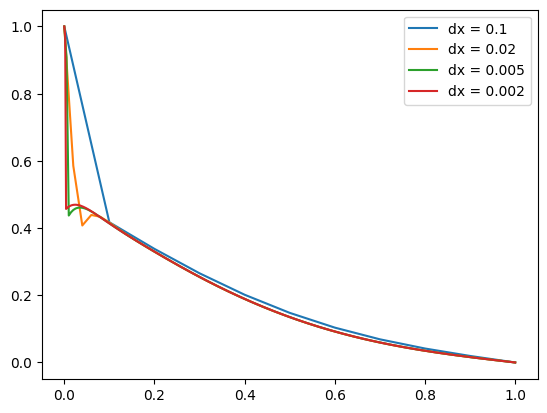

In [3]:
for nx in [11, 51, 201, 501]:
    print(nx)
    Crank_Nicholson(nx, 1./(nx-1), 0.01)
plb.legend()
plb.show()

Change tend to a large value to see how the solution behave in the long run.

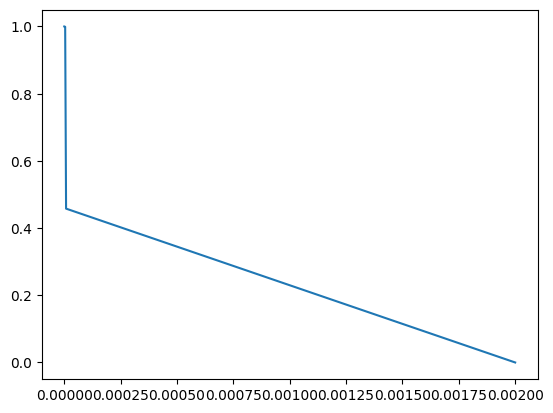

In [4]:
Crank_Nicholson(501, 1./500., 0.1, tend=10)

### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1) Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

In [15]:
#===========================================================================
# Implements the Upwind method for solving Hyperbolic PDE's
# Parameters:
# - xmin : minimum x of the simulation grid
# - xmax : maximum x of the simulation grid
# - nx   : number of abscissa to simulate
# [Option]
# - tend  : simulation time
# - dtout : separation between timesteps which we want to record
# Returns:
# - x     : Array of abscissa
# - res_U : Array of curves recorded at each time step
# - res_t : Assay of time steps recorded
#===========================================================================
def upwind(xmin : float, xmax : float, nx : int, tend : float = 10., dtout : float = 1.0) -> tuple[ndarray]:
    
    # Initialize return arrays
    res_U = []
    res_t = []
    
    # Set up the grid.
    x = np.linspace(xmin, xmax, nx)
    dx = (xmax - xmin) / (nx - 1)
    dt = 0.8 * dx
    
    # Initial conditions
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)
    
    # Start simulation
    tout = t + dtout
    while t < tend:
        
        # Need a copy so that we don't bleed over when taking U_{i-1} and U_{i+1}
        Uold = np.copy(U)
    
        # Run upwind for each individual value in the array because we no longer have a constant vel
        for ix in range(1, nx - 1):
            if Uold[ix] > 0:
                U[ix] = Uold[ix] - Uold[ix]*dt*(Uold[ix] - Uold[ix-1]) / dx
            else:
                U[ix] = Uold[ix] - Uold[ix]*dt*(Uold[ix+1] - Uold[ix]) / dx

        t += dt
        
        # Record a point every tout time steps
        if t >= tout:
            res_U.append(np.copy(U))
            res_t.append(t)
            tout += dtout
            print("t = ", t)
    
    return x, res_U, res_t

# Plots all of the curves in Uarr and then makes a wireplot
# plotting Uarr over time
def plot_res(x : ndarray, Uarr : ndarray, tarr : ndarray) -> None:

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()

    for i, U in enumerate(Uarr):
        plt.plot(x, U, label=r"$t = {:.3G}$".format(tarr[i])) 

    ax.legend()

    # Create 3D-view of the solution.
    t, x = np.meshgrid(tarr, x)
    fig3D = plt.figure()
    ax3D = fig3D.add_subplot(projection='3d')
    #ax3D = Axes3D(fig3D)
    
    UT = np.array(Uarr).transpose()
    
    ax3D.plot_wireframe(t, x, UT, color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

    print("Done.")
    plt.show()

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


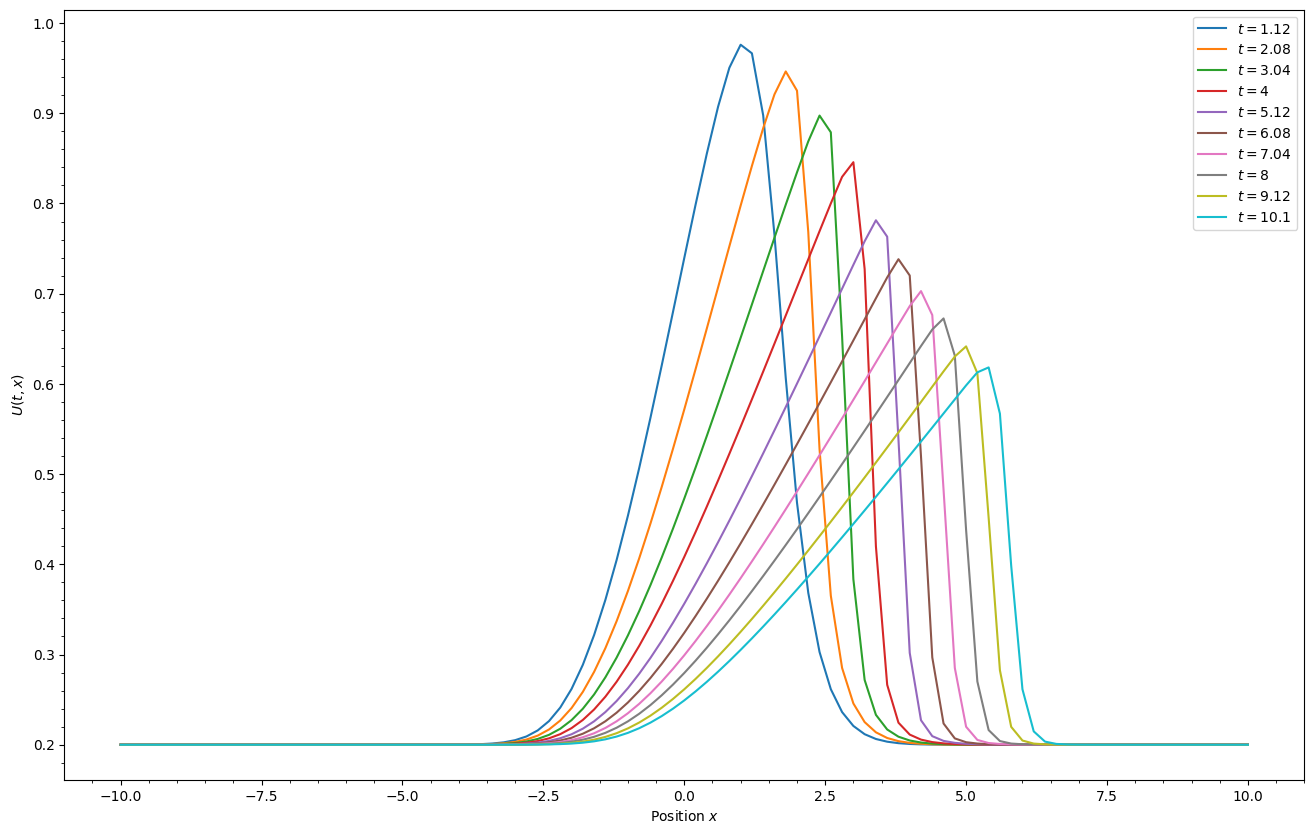

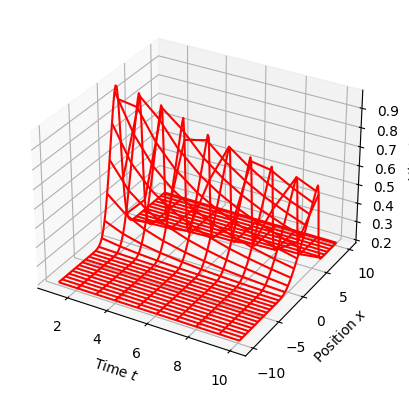

In [13]:
x, Uarr, tarr = upwind(-10., 10., 101)
plot_res(x, Uarr, tarr)

2) Please experiment with different grid sizes.

t =  1.0240000000000007
t =  2.0160000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.024000000000004
t =  6.0160000000000045
t =  7.008000000000005
t =  8.000000000000005
t =  9.024000000000006
t =  10.016000000000007
Done.


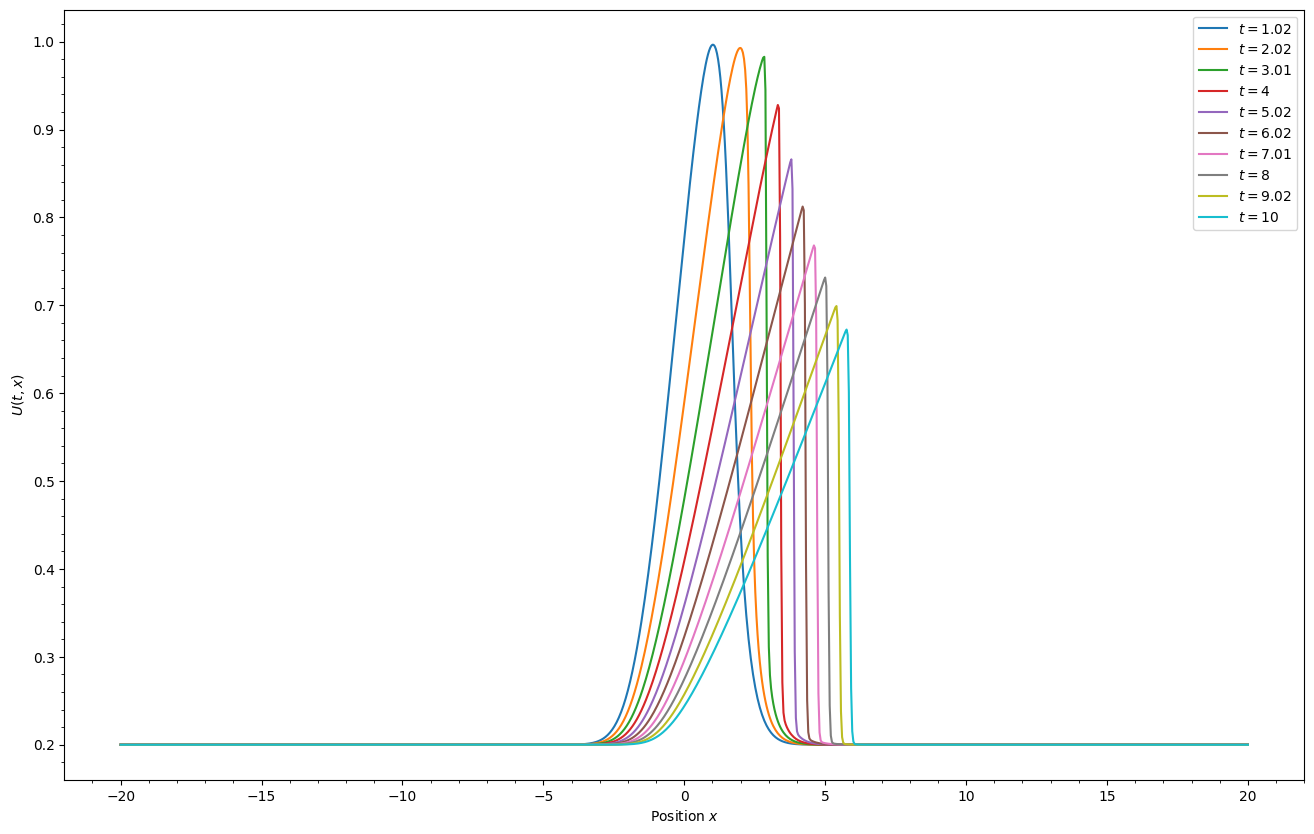

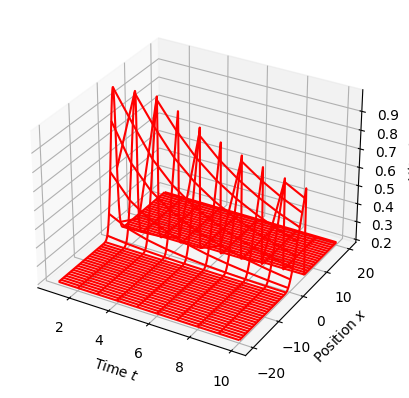

t =  1.0080000000000002
t =  2.016000000000001
t =  3.024000000000002
t =  4.032000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.016000000000005
t =  9.024000000000006
t =  10.032000000000007
Done.


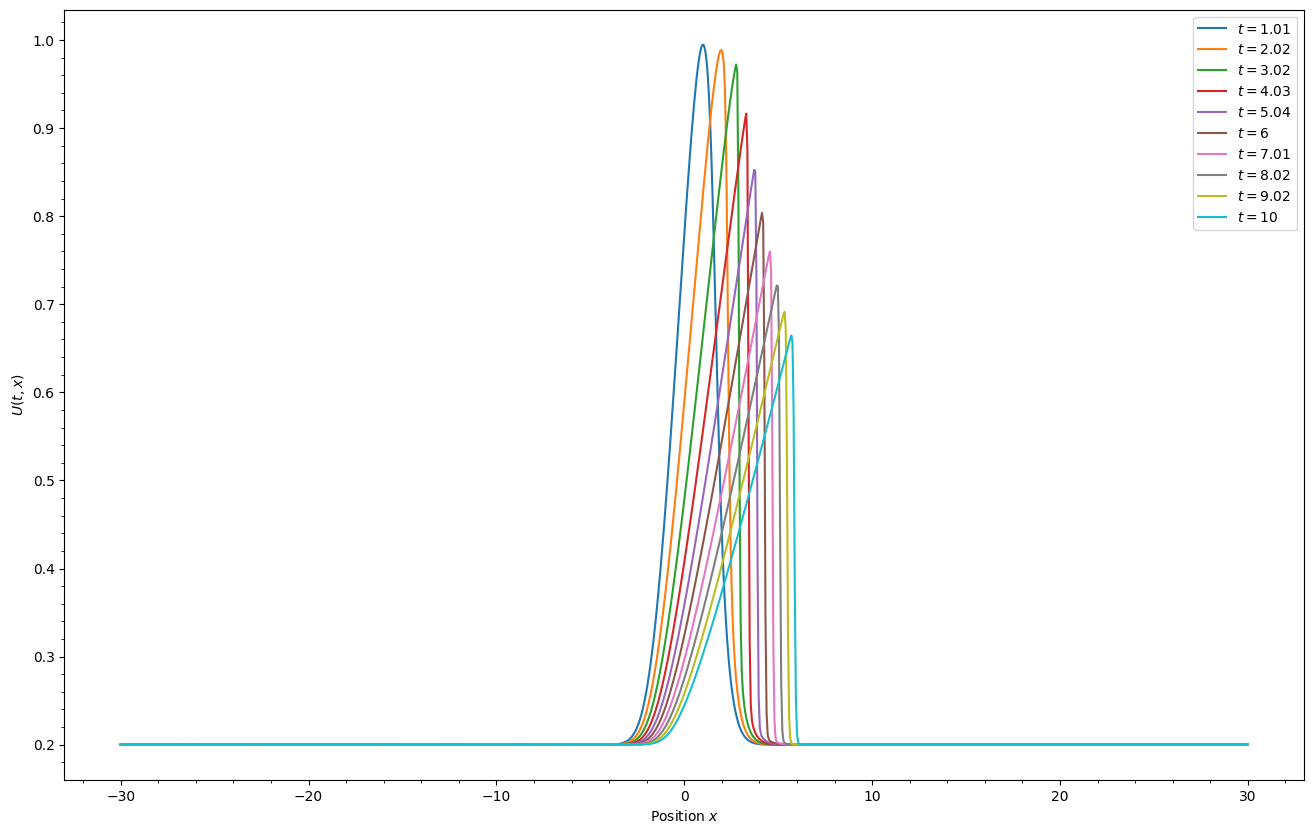

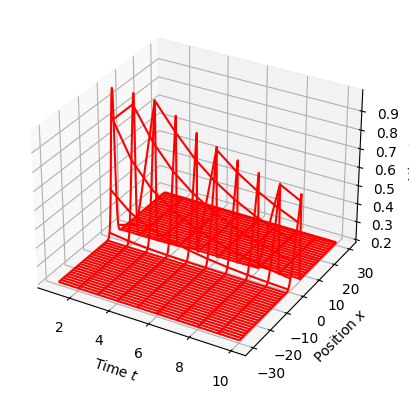

In [18]:
x, Uarr, tarr = upwind(-20., 20., 1001)
plot_res(x, Uarr, tarr)

x, Uarr, tarr = upwind(-30., 30., 1001)
plot_res(x, Uarr, tarr)

3) Now the solution develops a non-symmetric profile over time.  Can you explain why?

Because the spatial derivative (velocity) is proportional to the value, and the value is always positive for a gaussian, we see motion towards positive $x$.